### Lesson 6 - Instructions

Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

- Read in, parse, and pre-process the data
- Perform a brief exploratory analysis
- Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
- Graph the structure of your decision tree
- Graph the confusion matrix of your random forest model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [22]:
# assign variable to csv file
data = 'Bank Data.csv'

In [23]:
# pull in csv info into a pandas dataframe
df = pd.read_csv('Bank Data.csv', header = 0)

In [24]:
# check head of data 
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


### Understand Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null int64
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB


In [26]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


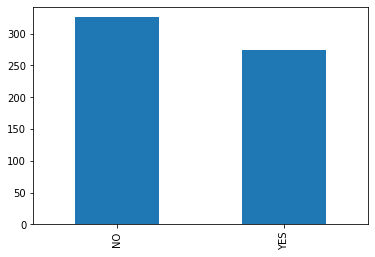

In [27]:
df['pep'].value_counts().plot(kind = 'bar')

### Define predictors (X) and target (Y)

In [28]:
# define X 
X = df.iloc[:, 0:9]

# define Y
Y = df.iloc[:, 10]

### Process data
To build the models we will need numeric data as inputs. Therefore we need to turn the categorical data into numeric variables. To do this, I'll use one hot encoding.

In [29]:
import category_encoders as ce
le = ce.OneHotEncoder(return_df=False,handle_unknown="ignore")

In [30]:
# one hot encode X variables
X_encoded = le.fit_transform(X)

In [31]:
#split test and train data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size = 0.2, random_state=1)

In [32]:
le.get_feature_names()

['age',
 'sex_1',
 'sex_2',
 'region_1',
 'region_2',
 'region_3',
 'region_4',
 'income',
 'married_1',
 'married_2',
 'children',
 'car_1',
 'car_2',
 'save_act_1',
 'save_act_2',
 'current_act_1',
 'current_act_2']

### Decision Tree

#### Train Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

#### Testing and Evaluate Decision Tree

In [34]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 80.83333333333333%
Gini accuracy is : 71.66666666666667%


### Random Forest Model

#### Train the Random Forest Model

In [35]:
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.1427108  0.01449044 0.01992271 0.01593931 0.01357624 0.00818252
 0.01720884 0.28640948 0.0749249  0.07397093 0.24045038 0.01494463
 0.01078745 0.02517686 0.02583992 0.00833456 0.00713003]


#### Testing and Evaluate RF Model

In [36]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

Y_test_hat = clf.predict(X_test)

print("Accuracy is : {}%".format(accuracy_score(y_test, Y_test_hat)*100))

Accuracy is : 74.16666666666667%


### Accuracy of decision tree and a random forest  approaches

In [37]:
print("Decision Tree - Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("RF - Accuracy is : {}%".format(accuracy_score(y_test, Y_test_hat)*100))

Decision Tree - Entropy accuracy is : 80.83333333333333%
RF - Accuracy is : 74.16666666666667%


### Graph structure of Decision Tree

In [38]:
from sklearn import tree

# assign features names
columns = le.get_feature_names()

#create a visualization of the tree
dotfile1 = open("bc_ent.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = columns) #columns[0:8]
dotfile1.close()

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot','-Tpng','bc_ent.dot','-o','bc_ent.png'])

0

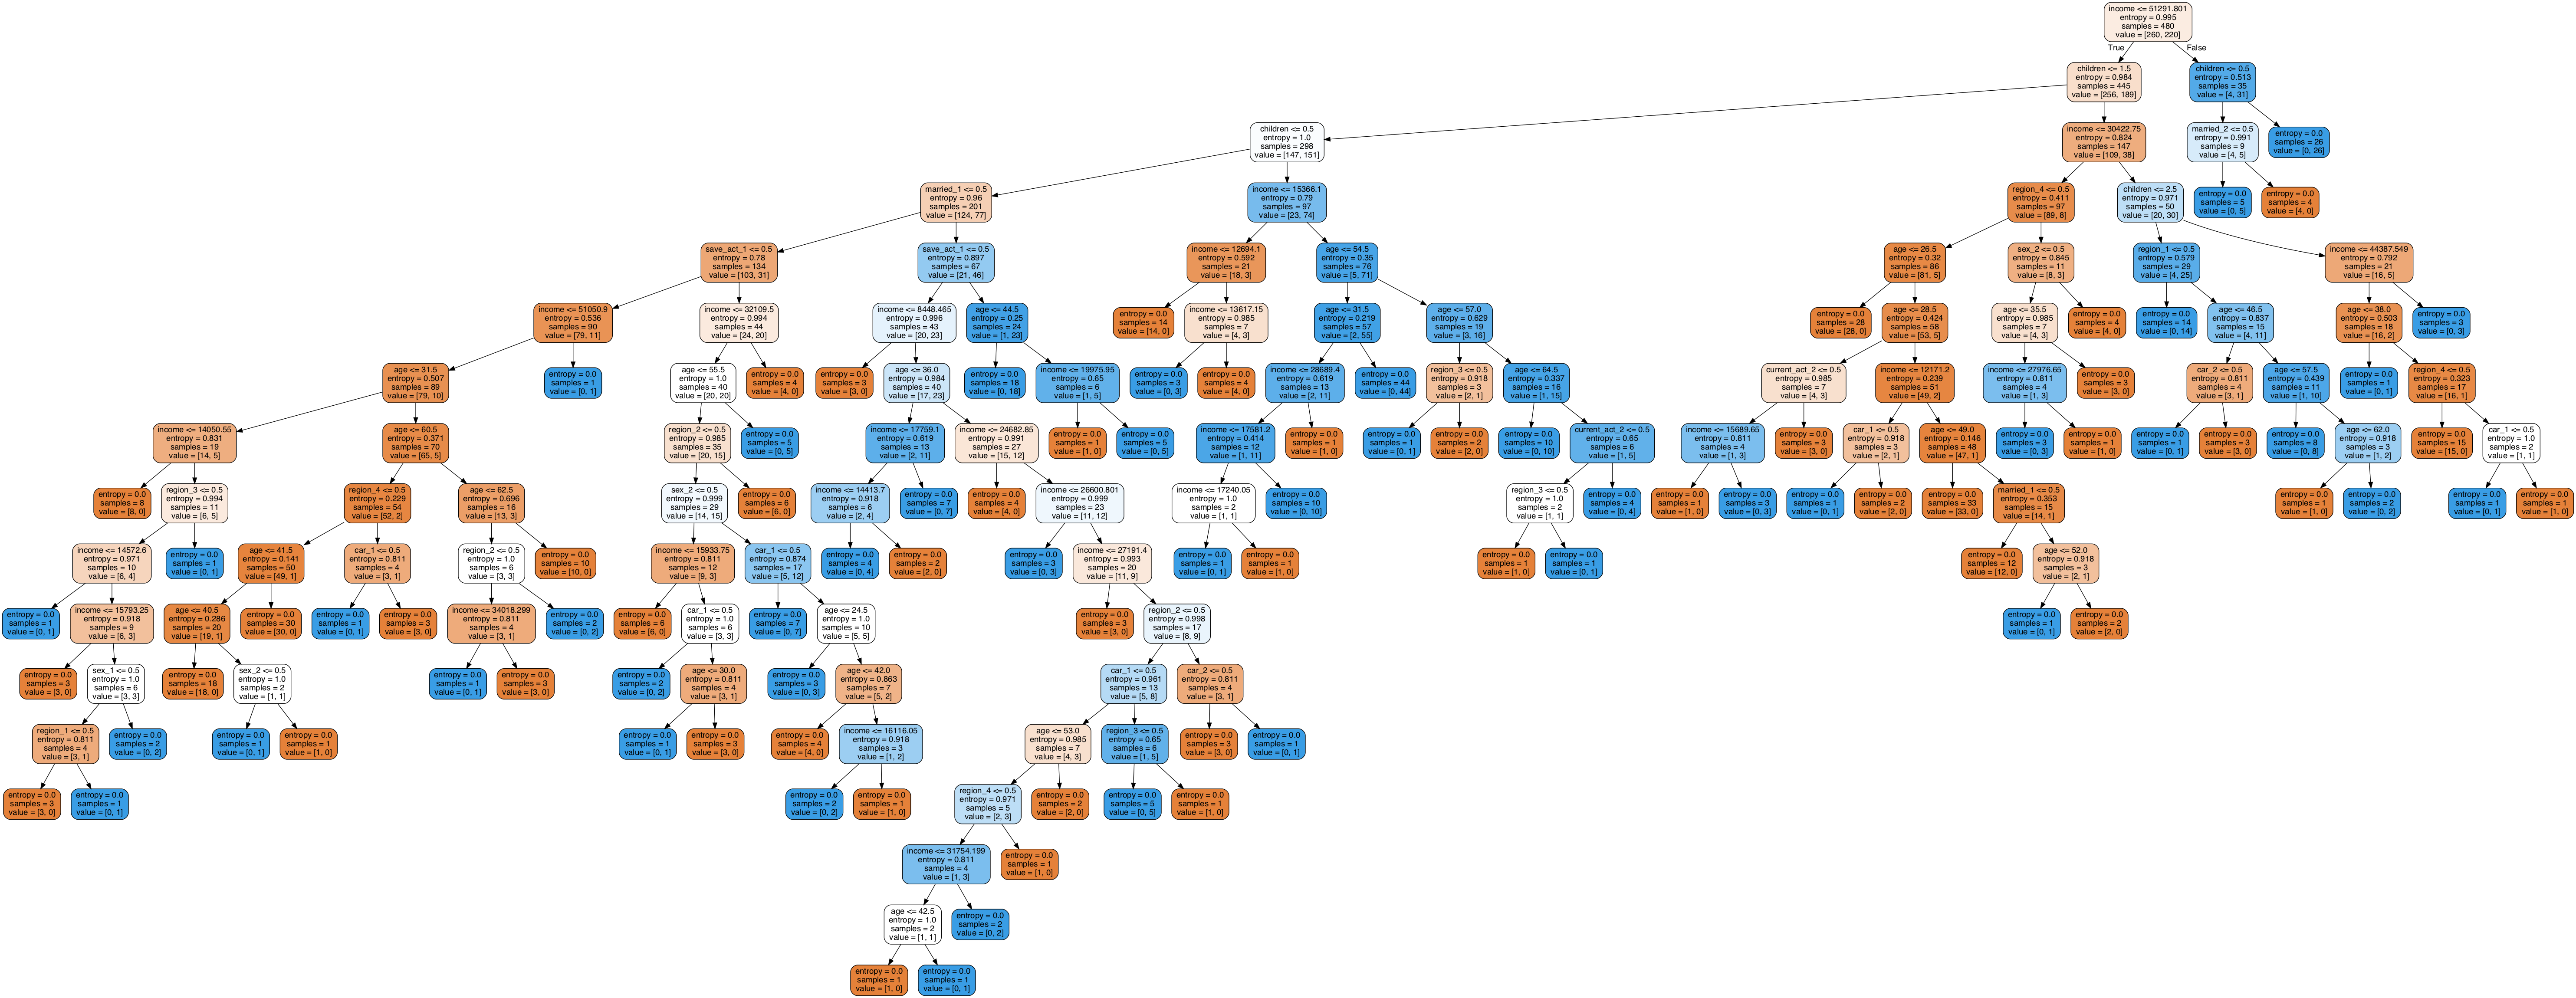

In [39]:
from IPython.display import Image
Image(filename='bc_ent.png', width=1500, height=1500)

### Graph Confusion Matrix of RF Model

In [20]:
# Generate a Confusion matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, Y_test_hat),
    columns=['Predicted Yes', 'Predicted No'],
    index=['True Yes', 'True No']
)

,Predicted Yes,Predicted No
True Yes,60,6
True No,25,29
